In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans

plt.style.use('seaborn')

In [2]:
df = pd.read_csv('cleaned_data/dds11.csv')

In [3]:
df = pd.read_csv('cleaned_data/dds11.csv')

# Make Categorical Variables
df['age_range'] = pd.Categorical(df['age_range'], 
                                 categories=['14-19', '20-26', '27-33',
                                             '34-50', '51-69', '70 or older'],
                                 ordered=True)
df['income'] = pd.Categorical(df['income'], 
               categories=['Less than $29,999', '$30,000 to $49,999',
                           '$50,000 to $99,999', '$100,000 to $299,999',
                           'More than $300,000', 'Do not know'], ordered=True)
df['willing_to_pay_no_ads_news'] = pd.Categorical(df['willing_to_pay_no_ads_news'],
                                                  categories=['Agree strongly', 'Agree somewhat',
                                                              'Disagree somewhat', 'Disagree strongly',
                                                              'N/A; I do not have a basis to answer'],
                                                 ordered=True)

### Groups to Categorize:
1. Age Range
2. Gender
3. Region
4. Income
5. Ethnicitiy

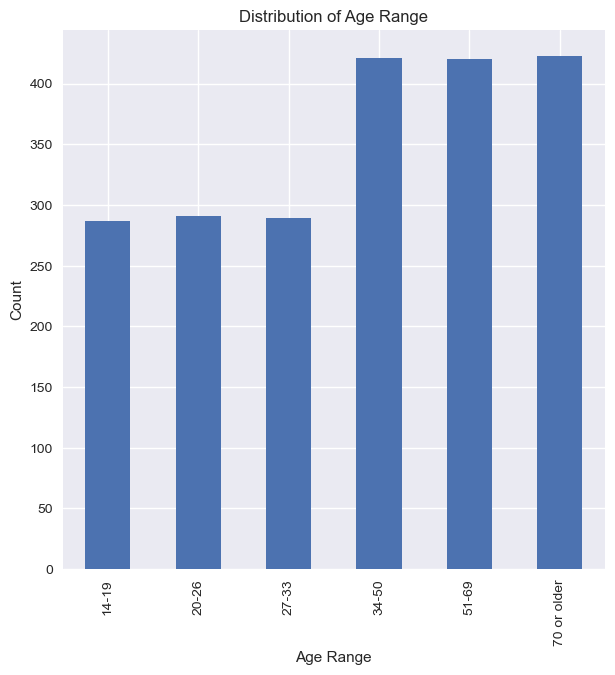

In [4]:
# Plot Distribution of Each of Those Groups

# Age Range
plt.figure(figsize=(7,7))
pd.Categorical(df['age_range'])\
    .value_counts()\
    .plot(kind='bar')
plt.title('Distribution of Age Range')
plt.xlabel('Age Range'); plt.ylabel('Count')
plt.show()

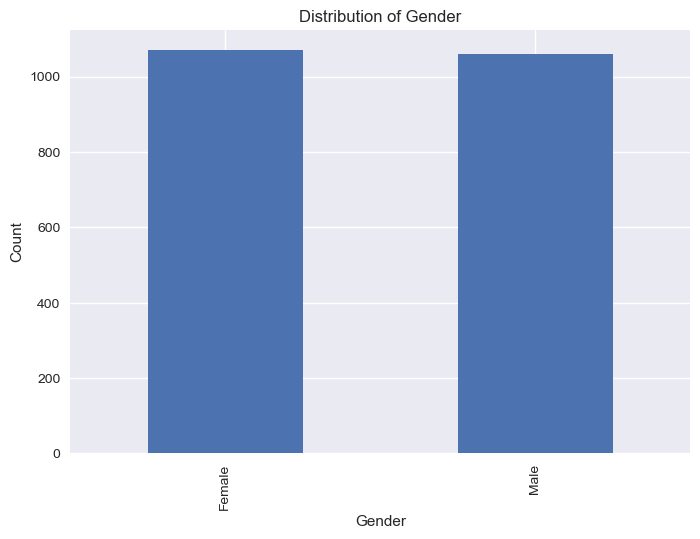

In [5]:
# Distribution of Gender
df['gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender'); plt.ylabel('Count')
plt.show()

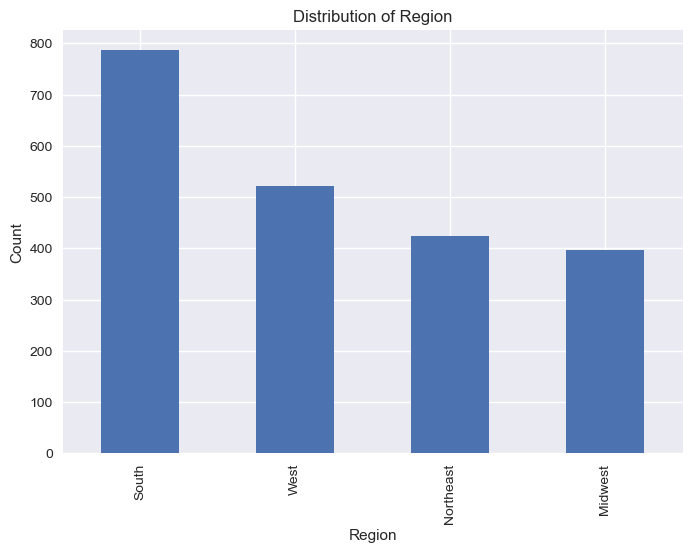

In [6]:
# Distribution of Region
df['region'].value_counts().plot(kind='bar')
plt.title('Distribution of Region')
plt.xlabel('Region'); plt.ylabel('Count')
plt.show()

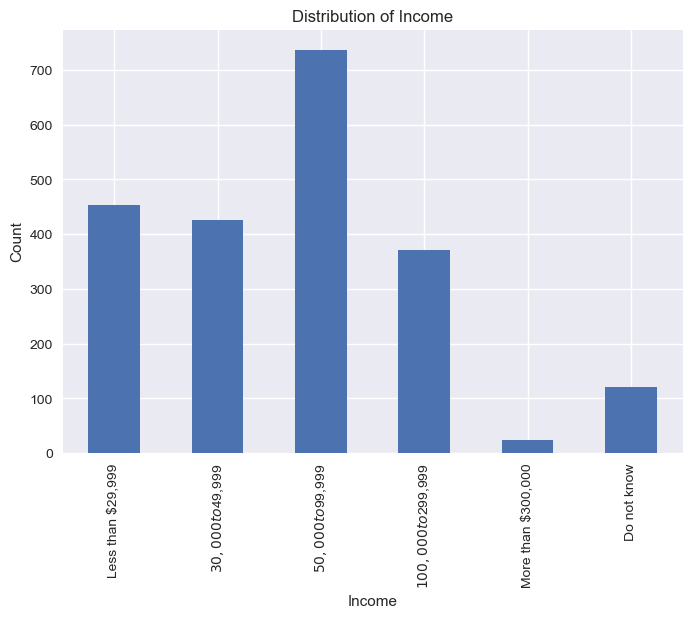

In [7]:
# Distribution of Income
pd.Categorical(df['income'])\
    .value_counts().plot(kind='bar')
plt.title('Distribution of Income')
plt.xlabel('Income'); plt.ylabel('Count')
plt.show()

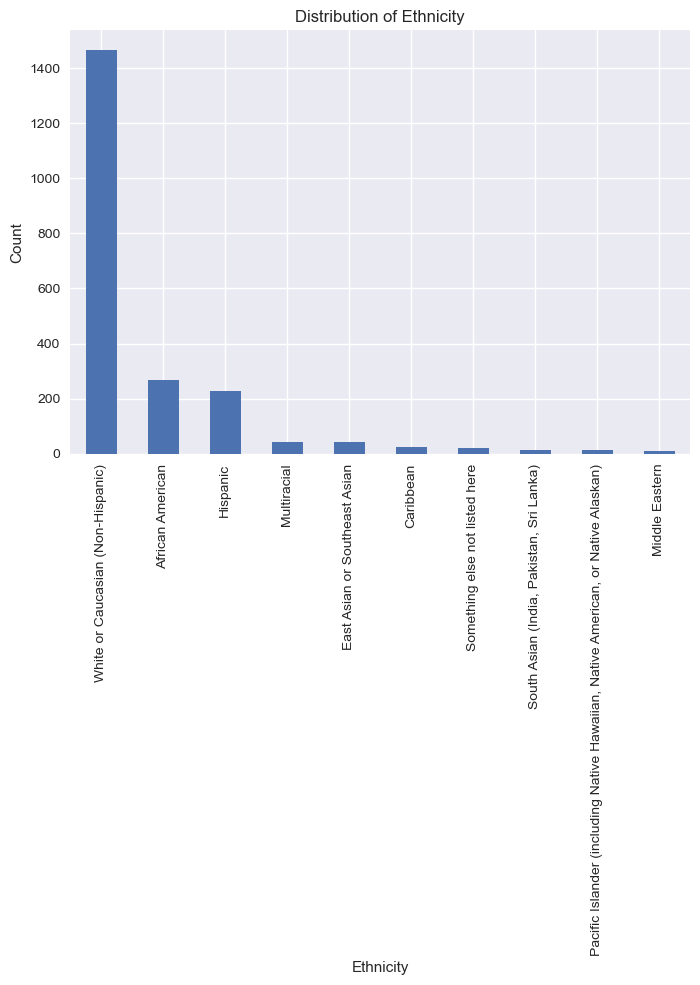

In [8]:
# Distribution of Ethnicity
df['ethnicity'].value_counts().plot(kind='bar')
plt.title('Distribution of Ethnicity')
plt.xlabel('Ethnicity'); plt.ylabel('Count')
plt.show()

### Breakdown of Habits By Group

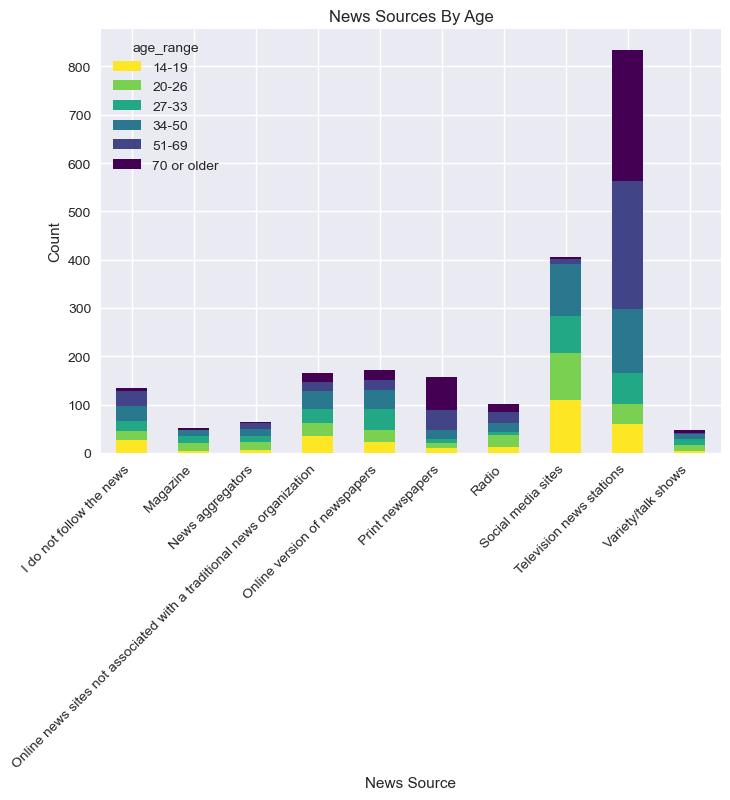

In [9]:
df[['age_range', 'news_source']].value_counts().reset_index()\
    .pivot(index='news_source', columns='age_range', values=0)\
    .plot(kind='bar', stacked=True, colormap='viridis_r')
plt.xticks(rotation=45, ha='right')
plt.title('News Sources By Age')
plt.xlabel('News Source'); plt.ylabel('Count')
plt.show()

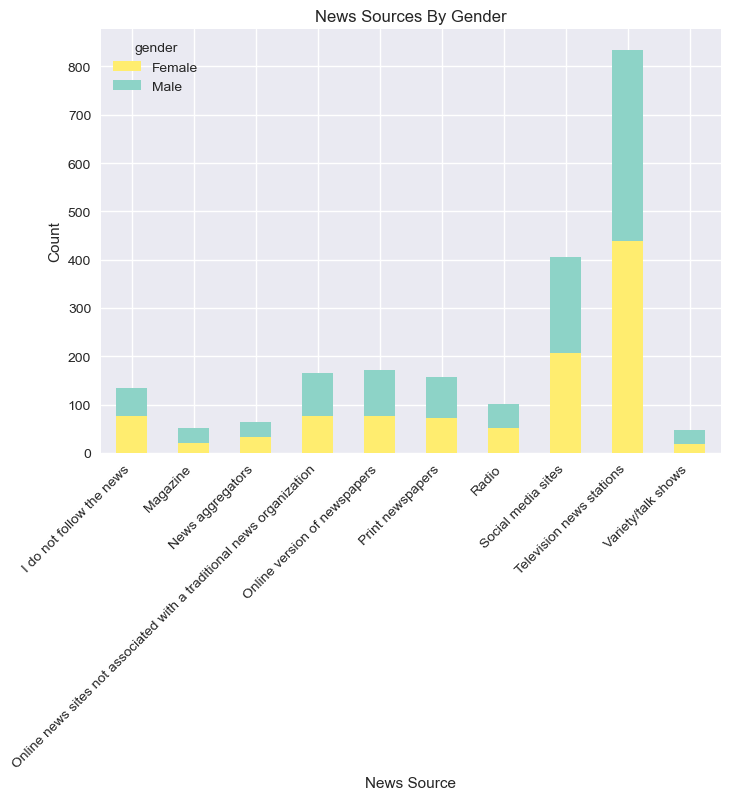

In [10]:
df[['gender', 'news_source']].value_counts().reset_index()\
    .pivot(index='news_source', columns='gender', values=0)\
    .plot(kind='bar', stacked=True, colormap='Set3_r')
plt.xticks(rotation=45, ha='right')
plt.title('News Sources By Gender')
plt.xlabel('News Source'); plt.ylabel('Count')
plt.show()

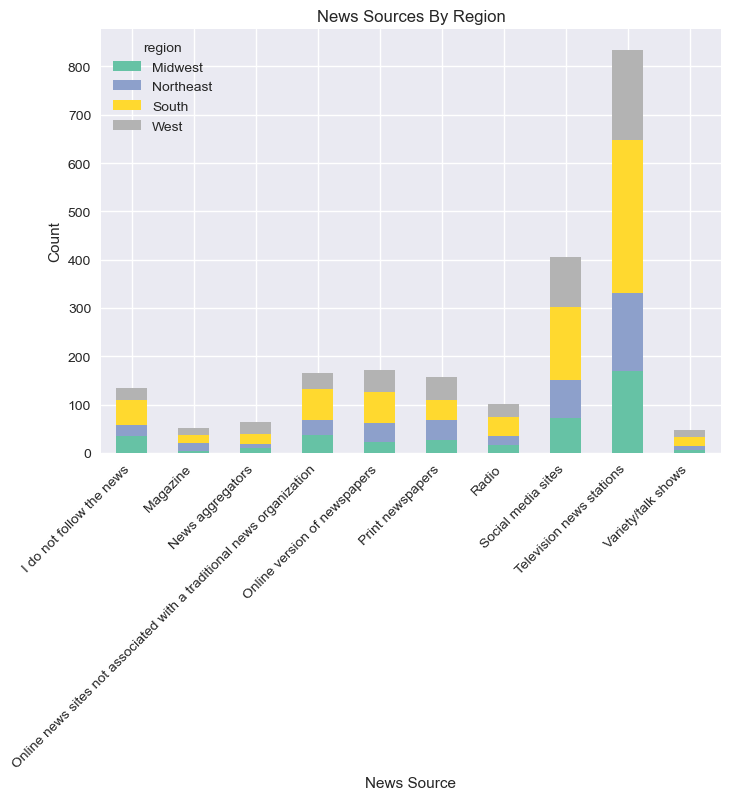

In [11]:
df[['region', 'news_source']].value_counts().reset_index()\
    .pivot(index='news_source', columns='region', values=0)\
    .plot(kind='bar', stacked=True, colormap='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('News Sources By Region')
plt.xlabel('News Source'); plt.ylabel('Count')
plt.show()

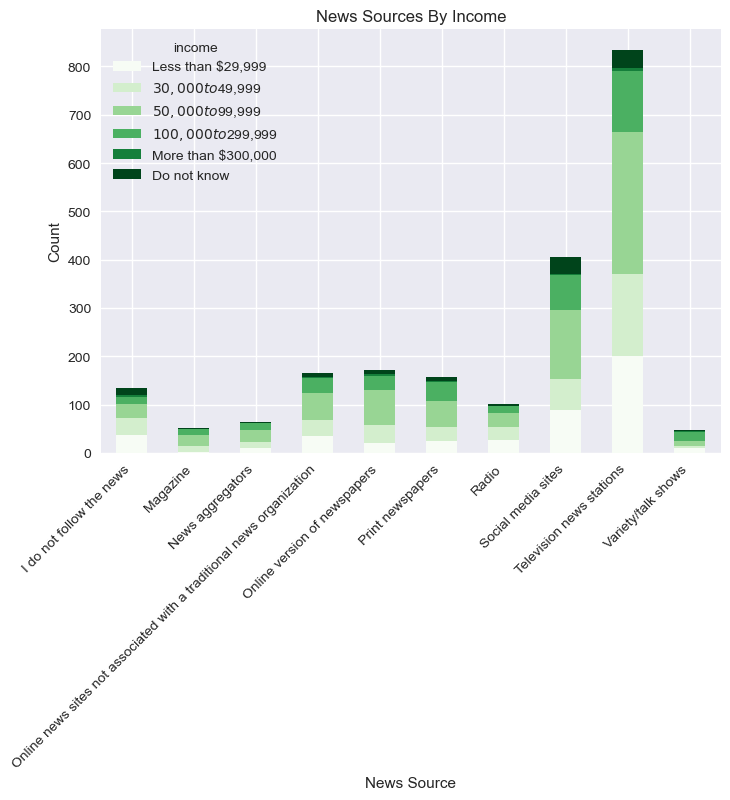

In [12]:
df[['income', 'news_source']].value_counts().reset_index()\
    .pivot(index='news_source', columns='income', values=0)\
    .plot(kind='bar', stacked=True, colormap='Greens')
plt.xticks(rotation=45, ha='right')
plt.title('News Sources By Income')
plt.xlabel('News Source'); plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'I would rather pay for news online in exchange for not being exposed to advertisements\n')

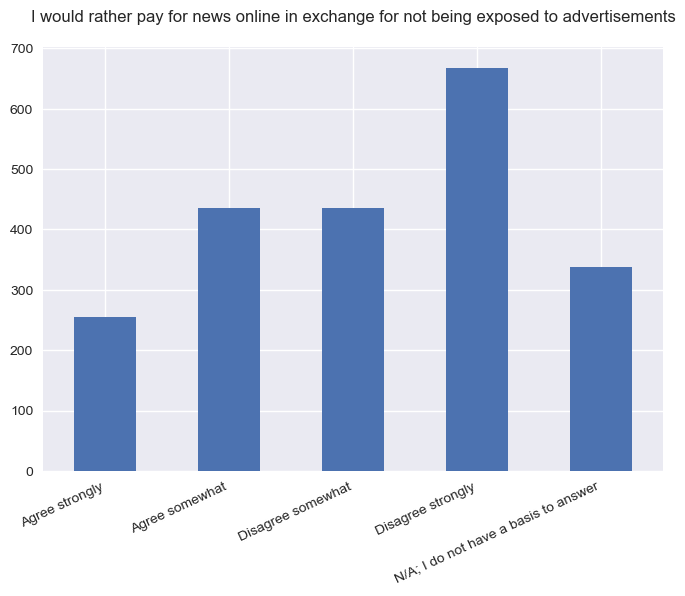

In [13]:
pd.Categorical(df['willing_to_pay_no_ads_news'])\
    .value_counts().plot(kind='bar')
plt.xticks(rotation=25, ha='right')
plt.title('I would rather pay for news online in exchange for not being exposed to advertisements\n')

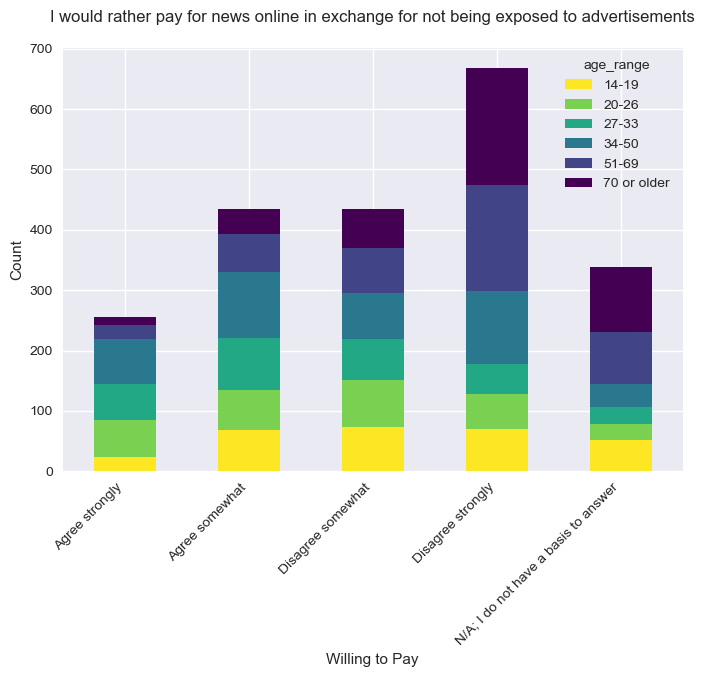

In [14]:
df[['willing_to_pay_no_ads_news', 'age_range']].value_counts().reset_index()\
    .pivot(index='willing_to_pay_no_ads_news', columns='age_range', values=0)\
    .plot(kind='bar', stacked=True, colormap='viridis_r')
plt.xticks(rotation=45, ha='right')
plt.title('I would rather pay for news online in exchange for not being exposed to advertisements\n')
plt.xlabel('Willing to Pay'); plt.ylabel('Count')
plt.show()

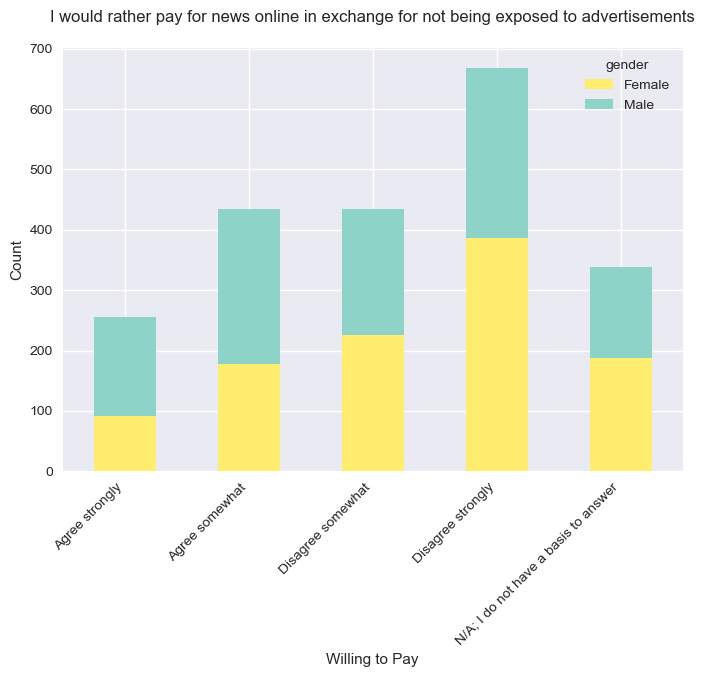

In [15]:
df[['willing_to_pay_no_ads_news', 'gender']].value_counts().reset_index()\
    .pivot(index='willing_to_pay_no_ads_news', columns='gender', values=0)\
    .plot(kind='bar', stacked=True, colormap='Set3_r')
plt.xticks(rotation=45, ha='right')
plt.title('I would rather pay for news online in exchange for not being exposed to advertisements\n')
plt.xlabel('Willing to Pay'); plt.ylabel('Count')
plt.show()

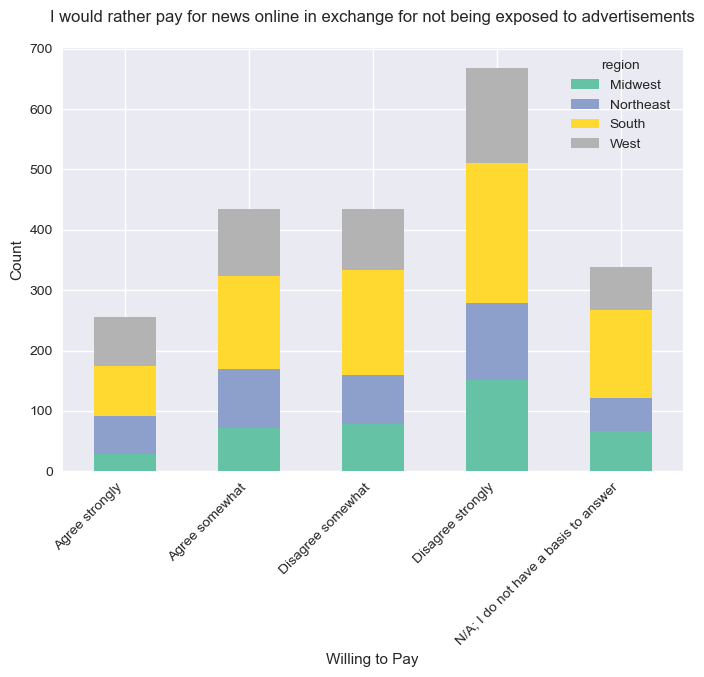

In [16]:
df[['willing_to_pay_no_ads_news', 'region']].value_counts().reset_index()\
    .pivot(index='willing_to_pay_no_ads_news', columns='region', values=0)\
    .plot(kind='bar', stacked=True, colormap='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('I would rather pay for news online in exchange for not being exposed to advertisements\n')
plt.xlabel('Willing to Pay'); plt.ylabel('Count')
plt.show()

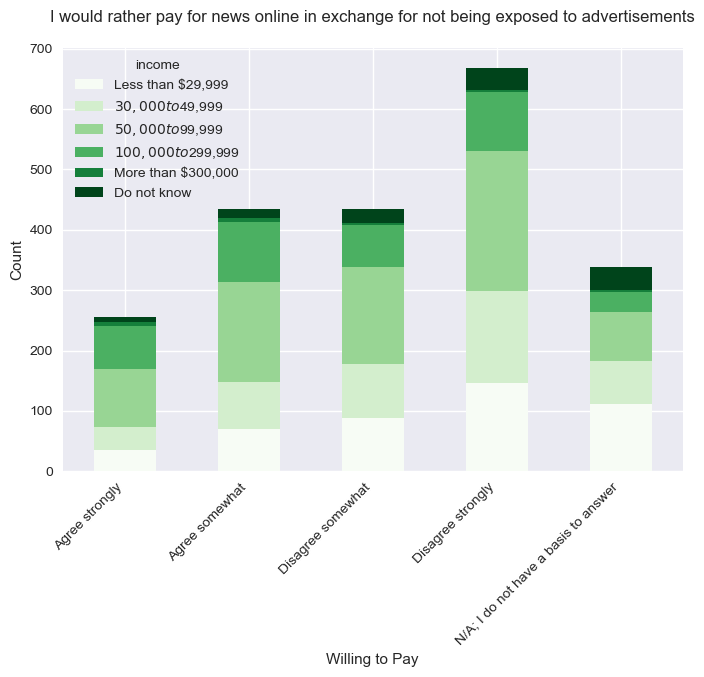

In [17]:
df[['willing_to_pay_no_ads_news', 'income']].value_counts().reset_index()\
    .pivot(index='willing_to_pay_no_ads_news', columns='income', values=0)\
    .plot(kind='bar', stacked=True, colormap='Greens')
plt.xticks(rotation=45, ha='right')
plt.title('I would rather pay for news online in exchange for not being exposed to advertisements\n')
plt.xlabel('Willing to Pay'); plt.ylabel('Count')
plt.show()

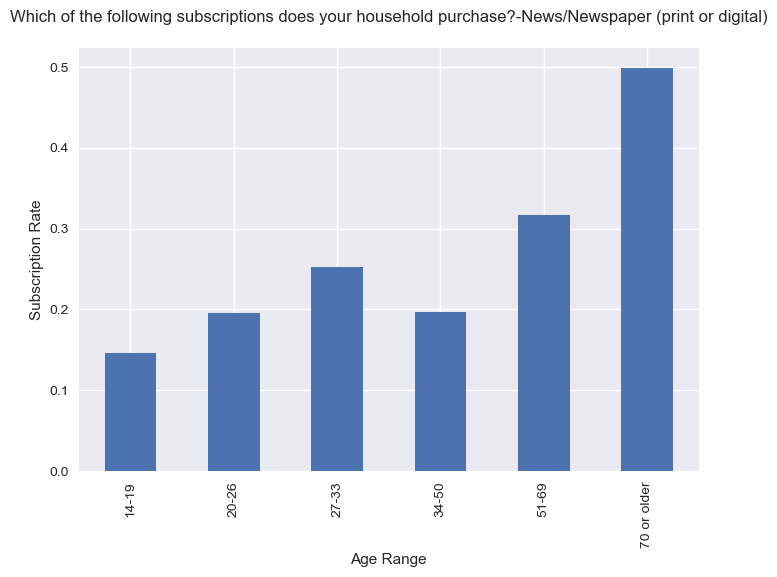

In [18]:
df[['age_range', 'subscriber_newspaper']]\
    .groupby('age_range')\
    .apply(lambda x: x['subscriber_newspaper'].sum() / x['age_range'].count())\
    .plot(kind='bar')
plt.title('Which of the following subscriptions does your household purchase?-News/Newspaper (print or digital)\n')
plt.xlabel('Age Range'); plt.ylabel('Subscription Rate')
plt.show()

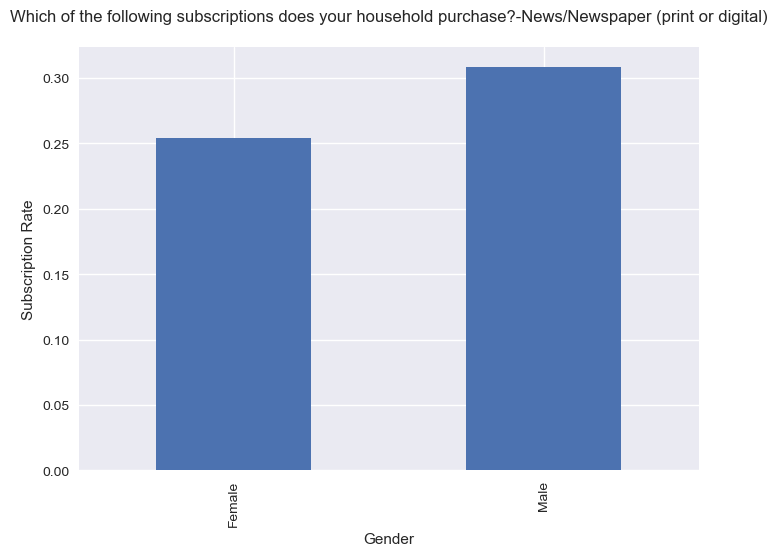

In [19]:
df[['gender', 'subscriber_newspaper']]\
    .groupby('gender')\
    .apply(lambda x: x['subscriber_newspaper'].sum() / x['gender'].count())\
    .plot(kind='bar')
plt.title('Which of the following subscriptions does your household purchase?-News/Newspaper (print or digital)\n')
plt.xlabel('Gender'); plt.ylabel('Subscription Rate')
plt.show()

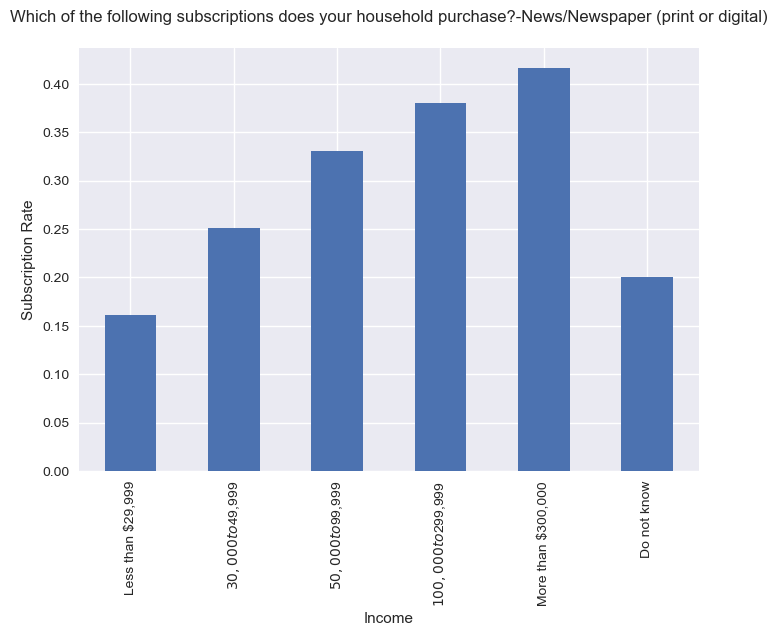

In [20]:
df[['income', 'subscriber_newspaper']]\
    .groupby('income')\
    .apply(lambda x: x['subscriber_newspaper'].sum() / x['income'].count())\
    .plot(kind='bar')
plt.title('Which of the following subscriptions does your household purchase?-News/Newspaper (print or digital)\n')
plt.xlabel('Income'); plt.ylabel('Subscription Rate')
plt.show()

In [21]:
df['rank_entertainment_news']

0       2.0
1       0.0
2       2.0
3       0.0
4       0.0
       ... 
2126    0.0
2127    0.0
2128    0.0
2129    0.0
2130    0.0
Name: rank_entertainment_news, Length: 2131, dtype: float64

## Grouping respondents and finding trends

### Task 1: What are some latent factors for market segmentation. Can we cluster people into distinct groups

In [22]:
# normalize the age data
df['age_norm'] = (df.age - df.age.mean()) / df.age.std()

# Get all willing to pay vars
willing_to_pay_vars = [col for col in df.columns if 'willing_to_pay' in col]
demographic_vars = ['age_norm', 'income', 'gender']

# Encode vars

var_map = {
    'Agree somewhat': 1,
    'Agree strongly': 2,
    'Disagree somewhat': 3,
    'Disagree strongly': 4,
    'N/A; I do not have a basis to answer': 5
}

for var in willing_to_pay_vars:
    df[var] = df[var].map(var_map)

# Convert categorical demographic variables to numerical features
income_map = {
    'Less than $29,999': 1,
    '$30,000 to $49,999': 2,
    '$50,000 to $99,999': 3,
    '$100,000 to $299,999': 4,
    'More than $300,000': 5,
    'Do not know': 6
}
df['income'] = df['income'].map(income_map)

gender_map = {
    'Male': 1,
    'Female': 2,
}
df['gender'] = df['gender'].map(gender_map)

ethnicity_map = {}
for i, ethno in enumerate(np.unique(df.ethnicity)):
    ethnicity_map[ethno] = i

df['ethnicity'] = df['ethnicity'].map(ethnicity_map)

clustering_vars = (willing_to_pay_vars + demographic_vars + ['ethnicity', 'children'] + [col for col in df.columns if 'plan_to_purchase' in col] +
                   [col for col in df.columns if 'home_entertainment' in col or 'subscriber' in col])
                        


In [23]:
'willing_to_pay_no_ads_news' in df.columns

True

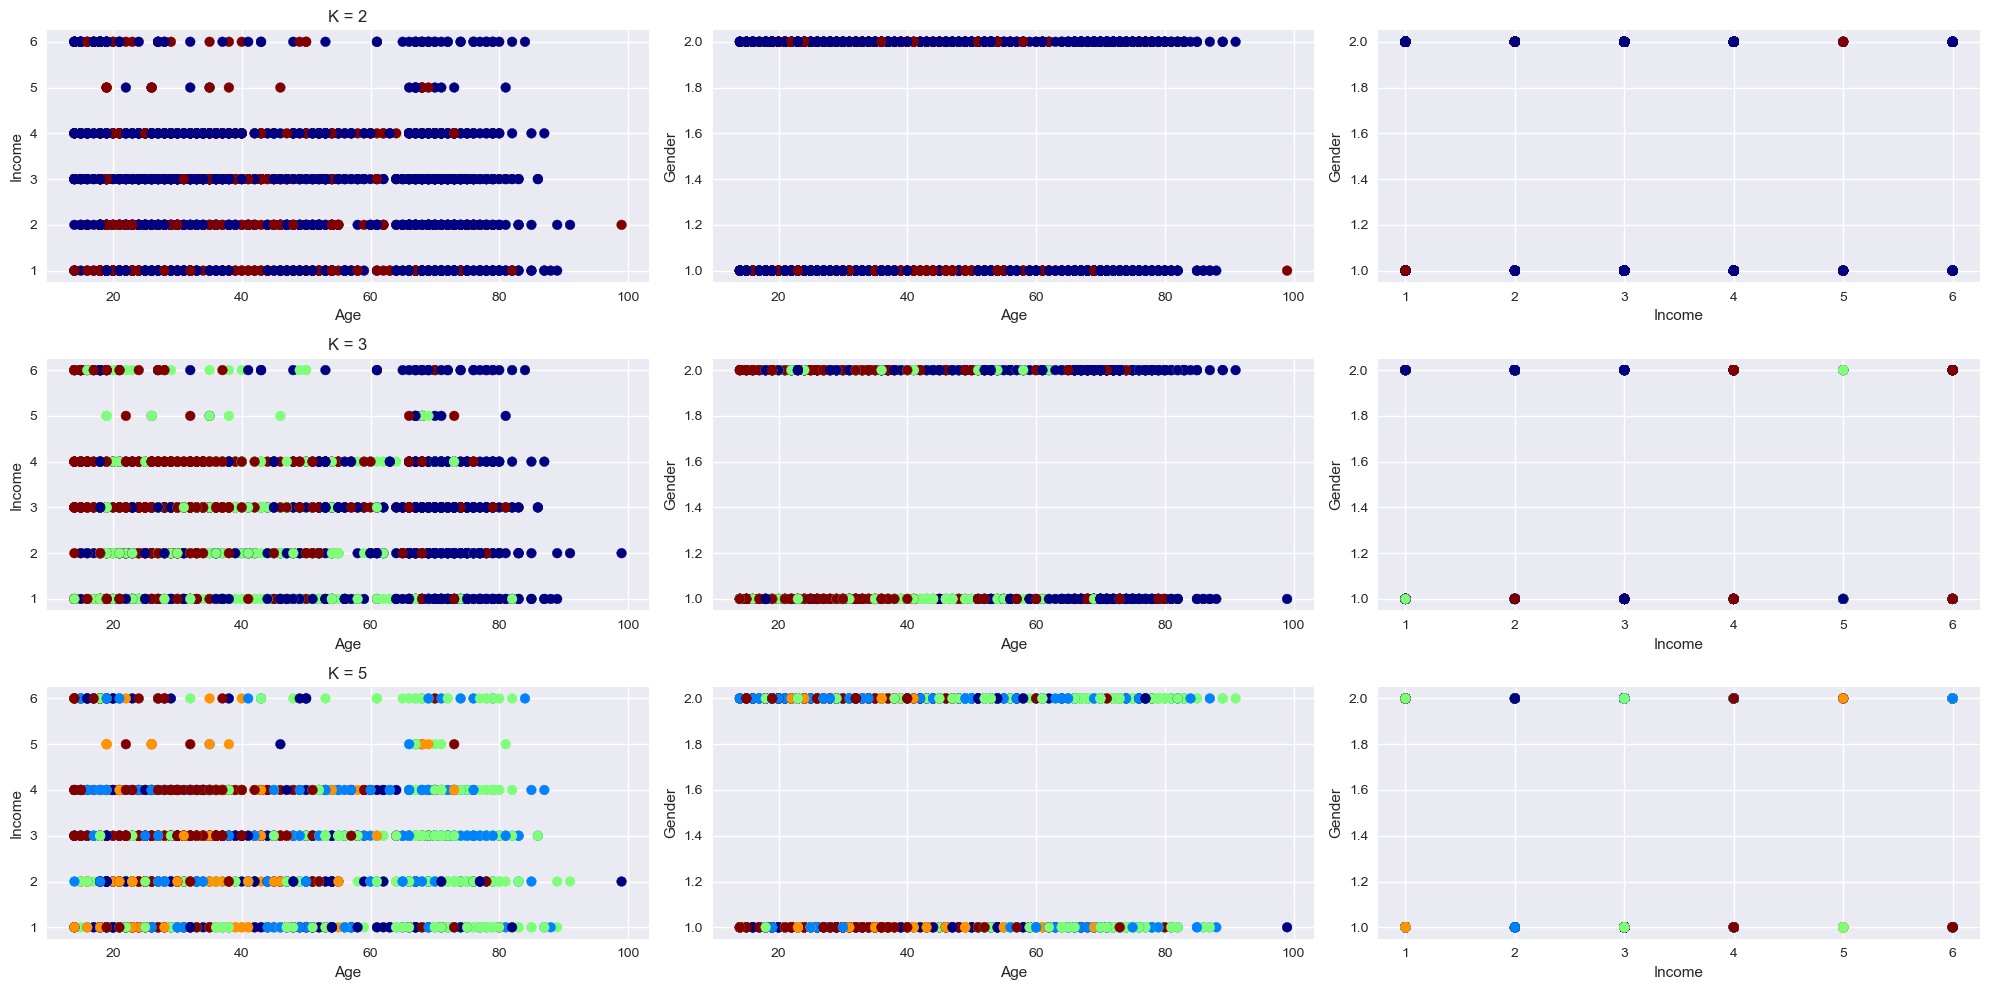

In [620]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# # One-hot encode categorical feature variables
# encoder = OneHotEncoder()
# X = encoder.fit_transform(df[feature_vars])

# Perform k-means clustering
k_values = [2, 3, 5]

# create a figure with subplots
fig, axes = plt.subplots(len(k_values), len(demographic_vars), figsize=(20, 10))


# Iterate over each K-means value and create a scatter plot for age vs. income, age vs. gender, and income vs. gender
for i, k in enumerate(k_values):

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[clustering_vars])
    labels = kmeans.labels_


    
    # Create scatter plots for age vs. income, age vs. gender, and income vs. gender on this row
    axes[i, 0].scatter(df.age, df.income, c=labels, cmap='jet')
    axes[i, 0].set_title(f'K = {k}')
    axes[i, 0].set_xlabel('Age')
    axes[i, 0].set_ylabel('Income')
    
    axes[i, 1].scatter(df.age, df.gender, c=labels, cmap='jet')
    axes[i, 1].set_xlabel('Age')
    axes[i, 1].set_ylabel('Gender')
    
    axes[i, 2].scatter(df.income, df.gender, c=labels, cmap='jet')
    axes[i, 2].set_xlabel('Income')
    axes[i, 2].set_ylabel('Gender')

plt.tight_layout()
plt.show()


# NEED TO MODIFY
# Rethink what vars to cluster on (should include demographics probably, maybe one with just spending behaviors)
# Need to one hot encode/map in such a way that text which indicate higher spending inclination should have similar higher numbers associated
# Make 3 plots:
    # age vs income, c = label
    # income vs gener
    # age vs gender
# Now see if there are clusters forming

# can also run a classification model, which uses all feature to classify/predict willing_to_pay_no_ads and see what variables are important and if those can be used for market segmentation

# These 2 analyses (supervised and unsupervised) with tons of EDA should suffice for report.


Age seems to be a super important variable in separating clusters. Let's see if principal components can work

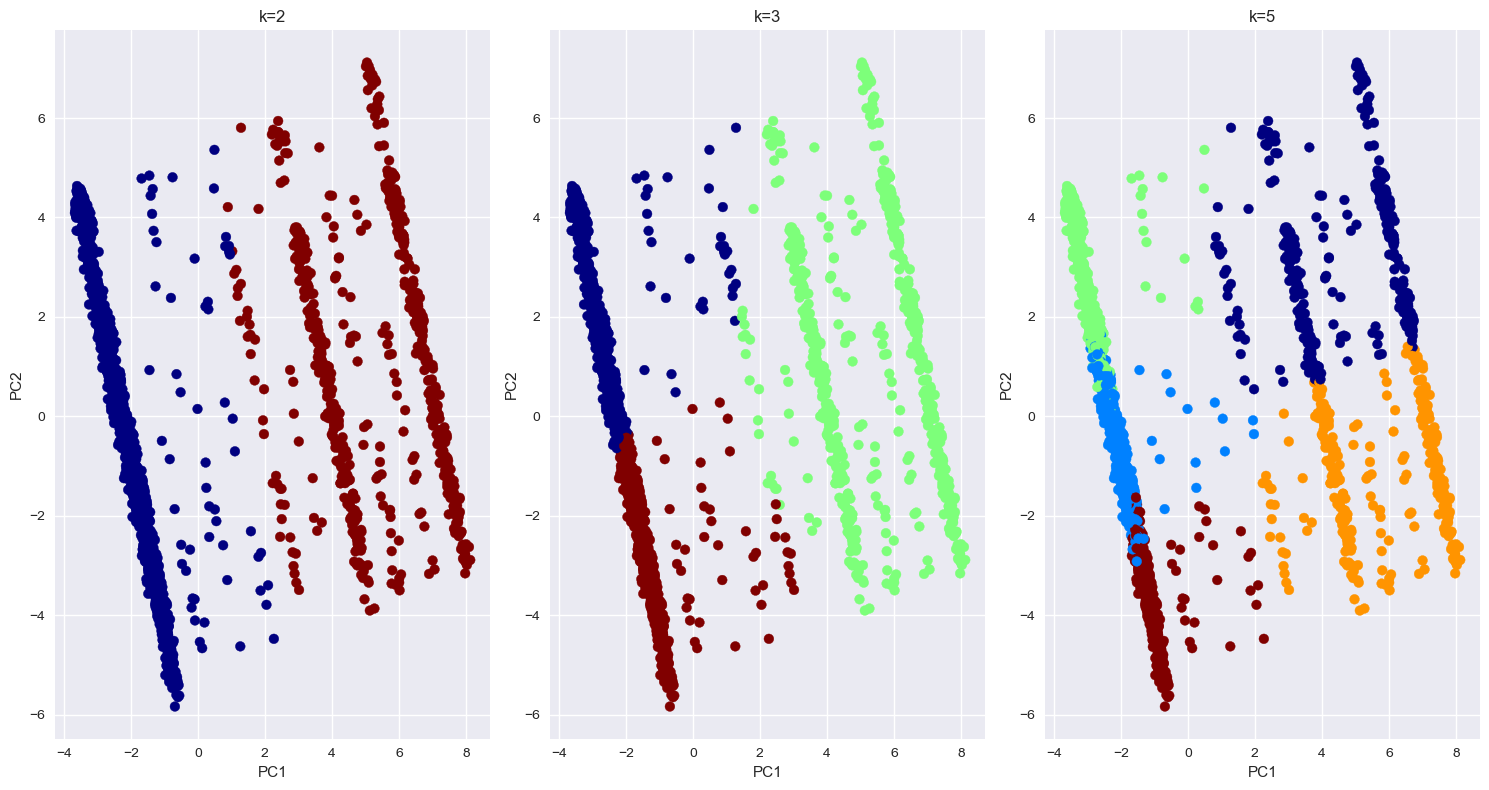

In [621]:
# Do the same as before, but plot against principal components
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[clustering_vars])

# Add the 2 principal components to the dataframe
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# create a figure with subplots
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 8))


# Iterate over each K-means value and create a scatter plot for age vs. income, age vs. gender, and income vs. gender
for i, k in enumerate(k_values):

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[clustering_vars])
    labels = kmeans.labels_
    
    # Plot PC1 vs PC2
    axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='jet')
    axes[i].set_xlabel('PC1')
    axes[i].set_ylabel('PC2')
    axes[i].set_title(f'k={k}')
        
plt.tight_layout()
plt.show()
    



In [622]:
    'Agree somewhat': 1,
    'Agree strongly': 2,
    'Disagree somewhat': 3,
    'Disagree strongly': 4,
    'N/A; I do not have a basis to answer': 5


SyntaxError: illegal target for annotation (2274498989.py, line 1)

In [ ]:
df_new = df.copy()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_new[clustering_vars])
labels = kmeans.labels_

df_new['labels'] = labels
grouped_df = df_new.groupby([labels, 'willing_to_pay_no_ads_news'])

# Count the number of occurrences of each value of the outcome variable within each group
counts = grouped_df.size()

# Calculate the proportion of people who had each value of the outcome variable within each group
proportions = counts.groupby(level=0).apply(lambda x: x / x.sum())

# Print the resulting proportions for each group
print(proportions)


    # 'Agree somewhat': 1,
    # 'Agree strongly': 2,
    # 'Disagree somewhat': 3,
    # 'Disagree strongly': 4,
    # 'N/A; I do not have a basis to answer': 5


   willing_to_pay_no_ads_news
0  2                             0.015094
   1                             0.038994
   3                             0.130818
   4                             0.519497
   5                             0.295597
1  2                             0.106961
   1                             0.237691
   3                             0.217317
   4                             0.312394
   5                             0.125637
2  2                             0.240964
   1                             0.353414
   3                             0.271754
   4                             0.095047
   5                             0.038822
dtype: float64


C:\Users\Abhilash Biswas\AppData\Local\Temp\ipykernel_22052\2316241836.py:14: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  proportions = counts.groupby(level=0).apply(lambda x: x / x.sum())


In [55]:
df = pd.read_csv('cleaned_data/dds11.csv')

# Make Categorical Variables
df['age_range'] = pd.Categorical(df['age_range'], 
                                 categories=['14-19', '20-26', '27-33',
                                             '34-50', '51-69', '70 or older'],
                                 ordered=True)
df['income'] = pd.Categorical(df['income'], 
               categories=['Less than $29,999', '$30,000 to $49,999',
                           '$50,000 to $99,999', '$100,000 to $299,999',
                           'More than $300,000', 'Do not know'], ordered=True)

willing_to_pay_vars = [col for col in df.columns if 'willing_to_pay' in col]

for var in willing_to_pay_vars:
    df[var] = pd.Categorical(df[var],
                                                    categories=['Agree strongly', 'Agree somewhat',
                                                                'Disagree somewhat', 'Disagree strongly',
                                                                'N/A; I do not have a basis to answer'],
                                                    ordered=True)





In [30]:
df[willing_to_pay_vars].corr(numeric_only=False)

ValueError: could not convert string to float: 'Agree somewhat'

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assume that X is the feature matrix (2D numpy array or pandas DataFrame)
# and y is the target variable (1D numpy array or pandas Series)

# categoricals
target = 'willing_to_pay_no_ads_news'
# df_x = df.drop(columns=[target, 'PC1', 'PC2'])
df_x = df.drop(columns=[target] )
df_x = pd.get_dummies(df_x)
df_y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)


# Create a random forest classifier with 100 trees
rf_clf = RandomForestClassifier(n_estimators=500, random_state=42, min_samples_split=20, max_depth=10, max_features='sqrt')

# Fit the model to the training data
rf_clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = rf_clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report to see precision, recall, and F1 scores
class_report = classification_report(y_test, y_pred)
print(class_report)


Accuracy: 0.6346604215456675
                                      precision    recall  f1-score   support

                      Agree somewhat       0.45      0.60      0.51        75
                      Agree strongly       0.64      0.29      0.39        49
                   Disagree somewhat       0.57      0.53      0.55       100
                   Disagree strongly       0.72      0.81      0.76       137
N/A; I do not have a basis to answer       0.84      0.73      0.78        66

                            accuracy                           0.63       427
                           macro avg       0.64      0.59      0.60       427
                        weighted avg       0.65      0.63      0.63       427



In [43]:
fi= pd.DataFrame()
fi['features'] = df_x.columns
fi['importances'] = rf_clf.feature_importances_
fi.sort_values('importances', ascending=False).head(30)

,features,importances
375,willing_to_pay_no_ads_tv_Disagree strongly,0.049418
380,willing_to_pay_no_ads_movies_Disagree strongly,0.045678
360,willing_to_pay_no_ads_sports_Disagree strongly,0.037622
370,willing_to_pay_no_ads_music_Disagree strongly,0.036616
365,willing_to_pay_no_ads_games_Disagree strongly,0.032876
376,willing_to_pay_no_ads_tv_N/A; I do not have a ...,0.032729
381,willing_to_pay_no_ads_movies_N/A; I do not hav...,0.029593
361,willing_to_pay_no_ads_sports_N/A; I do not hav...,0.029284
371,willing_to_pay_no_ads_music_N/A; I do not have...,0.026691
386,target_ads_N/A; I do not have a basis to answer,0.020150


In [56]:
x = [col for col in df.columns if 'willing_to' in col]
x

['amt_willing_to_double_internet_speed',
 'willing_to_pay_no_ads_news',
 'willing_to_pay_no_ads_sports',
 'willing_to_pay_no_ads_games',
 'willing_to_pay_no_ads_music',
 'willing_to_pay_no_ads_tv',
 'willing_to_pay_no_ads_movies']

In [57]:
df = df[['willing_to_pay_no_ads_sports', 'willing_to_pay_no_ads_news','willing_to_pay_no_ads_tv']]

df = pd.get_dummies(df)

df.corr()

,willing_to_pay_no_ads_sports_Agree strongly,willing_to_pay_no_ads_sports_Agree somewhat,willing_to_pay_no_ads_sports_Disagree somewhat,willing_to_pay_no_ads_sports_Disagree strongly,willing_to_pay_no_ads_sports_N/A; I do not have a basis to answer,willing_to_pay_no_ads_news_Agree strongly,willing_to_pay_no_ads_news_Agree somewhat,willing_to_pay_no_ads_news_Disagree somewhat,willing_to_pay_no_ads_news_Disagree strongly,willing_to_pay_no_ads_news_N/A; I do not have a basis to answer,willing_to_pay_no_ads_tv_Agree strongly,willing_to_pay_no_ads_tv_Agree somewhat,willing_to_pay_no_ads_tv_Disagree somewhat,willing_to_pay_no_ads_tv_Disagree strongly,willing_to_pay_no_ads_tv_N/A; I do not have a basis to answer
willing_to_pay_no_ads_sports_Agree strongly,1.000000,-0.186279,-0.169825,-0.245400,-0.211337,0.443399,0.127114,-0.115601,-0.203404,-0.148347,0.413540,0.078140,-0.126849,-0.192229,-0.145355
willing_to_pay_no_ads_sports_Agree somewhat,-0.186279,1.000000,-0.212618,-0.307236,-0.264590,0.098860,0.341115,0.046783,-0.272076,-0.170313,0.067028,0.311923,-0.044886,-0.214616,-0.149021
willing_to_pay_no_ads_sports_Disagree somewhat,-0.169825,-0.212618,1.000000,-0.280098,-0.241219,-0.099592,-0.001985,0.386321,-0.141151,-0.156324,-0.078000,0.023341,0.334512,-0.151221,-0.143207
willing_to_pay_no_ads_sports_Disagree strongly,-0.245400,-0.307236,-0.280098,1.000000,-0.348566,-0.180284,-0.216800,-0.131967,0.568508,-0.176951,-0.173117,-0.211335,-0.057848,0.541541,-0.152853
willing_to_pay_no_ads_sports_N/A; I do not have a basis to answer,-0.211337,-0.264590,-0.241219,-0.348566,1.000000,-0.164256,-0.183539,-0.147623,-0.072558,0.603459,-0.137483,-0.145427,-0.087791,-0.097065,0.543910
willing_to_pay_no_ads_news_Agree strongly,0.443399,0.098860,-0.099592,-0.180284,-0.164256,1.000000,-0.186718,-0.186718,-0.249126,-0.160074,0.396617,0.082729,-0.141763,-0.178308,-0.133854
willing_to_pay_no_ads_news_Agree somewhat,0.127114,0.341115,-0.001985,-0.216800,-0.183539,-0.186718,1.000000,-0.256486,-0.342214,-0.219887,0.133246,0.270101,-0.035574,-0.221448,-0.166637
willing_to_pay_no_ads_news_Disagree somewhat,-0.115601,0.046783,0.386321,-0.131967,-0.147623,-0.186718,-0.256486,1.000000,-0.342214,-0.219887,-0.092870,0.053942,0.351797,-0.172561,-0.159979
willing_to_pay_no_ads_news_Disagree strongly,-0.203404,-0.272076,-0.141151,0.568508,-0.072558,-0.249126,-0.342214,-0.342214,1.000000,-0.293383,-0.225943,-0.202522,-0.063020,0.603962,-0.180183
willing_to_pay_no_ads_news_N/A; I do not have a basis to answer,-0.148347,-0.170313,-0.156324,-0.176951,0.603459,-0.160074,-0.219887,-0.219887,-0.293383,1.000000,-0.110007,-0.173852,-0.142923,-0.173812,0.708102


In [53]:
willing_to_pay_vars

[]

In [655]:
'willing_to_pay_no_ads_news' in willing_to_pay_vars


True

In [26]:
df[willing_to_pay_vars].corr()

C:\Users\Abhilash Biswas\AppData\Local\Temp\ipykernel_26820\3948238800.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[willing_to_pay_vars].corr()


,willing_to_pay_no_ads_sports,willing_to_pay_no_ads_games,willing_to_pay_no_ads_music,willing_to_pay_no_ads_tv,willing_to_pay_no_ads_movies
willing_to_pay_no_ads_sports,1.000000,0.596515,0.576209,0.558209,0.516387
willing_to_pay_no_ads_games,0.596515,1.000000,0.639950,0.593593,0.552155
willing_to_pay_no_ads_music,0.576209,0.639950,1.000000,0.644517,0.608735
willing_to_pay_no_ads_tv,0.558209,0.593593,0.644517,1.000000,0.688682
willing_to_pay_no_ads_movies,0.516387,0.552155,0.608735,0.688682,1.000000


In [654]:
df[willing_to_pay_vars].corr()

C:\Users\Abhilash Biswas\AppData\Local\Temp\ipykernel_22052\3948238800.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[willing_to_pay_vars].corr()


,willing_to_pay_no_ads_sports,willing_to_pay_no_ads_games,willing_to_pay_no_ads_music,willing_to_pay_no_ads_tv,willing_to_pay_no_ads_movies
willing_to_pay_no_ads_sports,1.000000,0.596515,0.576209,0.558209,0.516387
willing_to_pay_no_ads_games,0.596515,1.000000,0.639950,0.593593,0.552155
willing_to_pay_no_ads_music,0.576209,0.639950,1.000000,0.644517,0.608735
willing_to_pay_no_ads_tv,0.558209,0.593593,0.644517,1.000000,0.688682
willing_to_pay_no_ads_movies,0.516387,0.552155,0.608735,0.688682,1.000000


In [595]:
willing_to_pay_vars

['willing_to_pay_no_ads_news',
 'willing_to_pay_no_ads_sports',
 'willing_to_pay_no_ads_games',
 'willing_to_pay_no_ads_music',
 'willing_to_pay_no_ads_tv',
 'willing_to_pay_no_ads_movies']

In [596]:
'willing_to_pay_no_news_ads' in df.columns

False